In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
from tqdm.notebook import tqdm

%matplotlib inline

In [5]:
camera_type = 'iphone13'

settings = {}
if camera_type == 'iphone13':
    settings = {
        'ext': '.TIF',
        'splitter': 'IMG_',
        'need_crop': True,
        'crop_box': [800, 800, 3000, 2200],
        'folder': 'iphone13'
    }
elif camera_type == 'sony':
    settings = {
        'ext': '.tiff',
        'splitter': 'DSC',
        'need_crop': False,
        'folder': 'sony_a7c'
    }
    

images_folder = '/media/alexey/HDDData/datasets/image_denoising/ours_dataset/temp_checking/{}/raw/'.format(
    settings['folder']
)
images_folder = '/media/alexey/HDDData/datasets/image_denoising/ours_dataset/{}/scene_1/raw/'.format(
    settings['folder']
)

images_paths = [
    os.path.join(images_folder, fname) 
    for fname in os.listdir(images_folder)
    if fname.endswith(settings['ext'])
]
    

images_paths.sort(key=lambda x: int(os.path.splitext(x)[0].split(settings['splitter'])[-1]))
images_paths = images_paths[:10]

if settings['need_crop']:
    print('Use crop')
    x1, y1, x2, y2 = settings['crop_box']
    
    images = [
        cv2.cvtColor(
            cv2.imread(img_path, cv2.IMREAD_COLOR)[y1:y2, x1:x2],
            cv2.COLOR_BGR2RGB
        )
        for img_path in tqdm(images_paths)
    ]
else:
    images = [
        cv2.cvtColor(cv2.imread(img_path, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
        for img_path in tqdm(images_paths)
    ]
    
images = np.array(images)

Use crop


  0%|          | 0/10 [00:00<?, ?it/s]

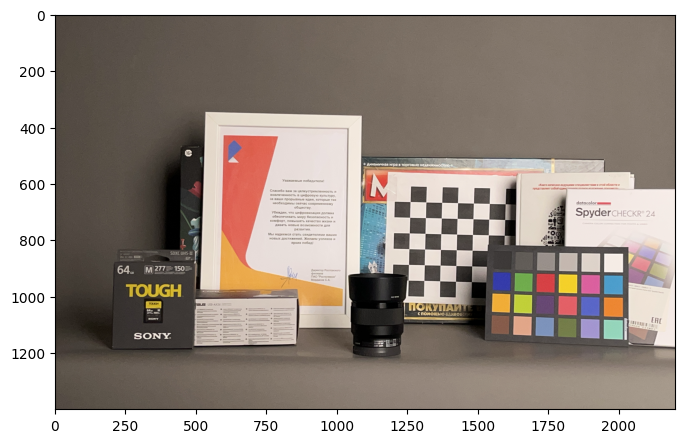

In [6]:
plt.figure(figsize=(8, 6))
plt.imshow(images[0])
plt.show()

In [7]:
diffs_psnr = [
    cv2.PSNR(images[0], img)
    for img in tqdm(images)
][1:]

  0%|          | 0/10 [00:00<?, ?it/s]

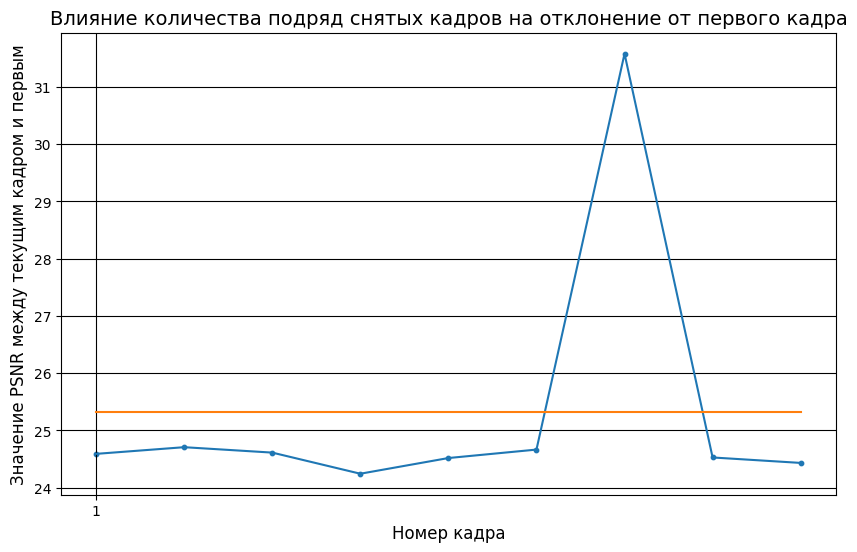

In [8]:
x_range = np.arange(0, len(diffs_psnr), 1) + 1

fig = plt.figure(figsize=(10, 6))

plt.rc('grid', color='black')

ax = fig.gca()
ax.set_xticks(np.arange(min(x_range), max(x_range) + 8, 9))

plt.title('Влияние количества подряд снятых кадров на отклонение от первого кадра', fontsize=14)
plt.plot(x_range, diffs_psnr)
plt.scatter(x_range, diffs_psnr, s=10)
plt.plot(x_range, [np.mean(diffs_psnr)] * len(x_range))
plt.xlabel('Номер кадра', fontsize=12)
plt.ylabel('Значение PSNR между текущим кадром и первым', fontsize=12)
plt.grid()
plt.savefig('/home/alexey/Downloads/both_shoots.png', transparent=True, dpi=400)
plt.show()

In [34]:
mean_frame = images.astype(np.float32).mean(axis=0).astype(np.uint8)

cv2.imwrite(
    '/home/alexey/Downloads/mean_sony_frame_scene_2.tiff', 
    cv2.cvtColor(mean_frame, cv2.COLOR_RGB2BGR)
)

True